In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Import required data
broomhall = '../data/broomhall2009.txt'
davies = '../data/davies2014.txt'

file = input("Please select file: 'broomhall' or 'davies': ")
if file == str('broomhall'):
    file = broomhall
elif file == str('davies'):
    file = davies
else:
    print('Please try again')

df = pd.read_csv(file, header=None, delim_whitespace=True, names=['n', 'l', 'nu', 'd_nu'])

Please select file: 'broomhall' or 'davies': broomhall


In [39]:
# List comprehension: creates a list that contains separate
# arrays for l=0,1,2... etc.
l = [df[(df.l == i)] for i in (range(max(df.l)-min(df.l)+1))]

135.4720000000002
135.68600000000004


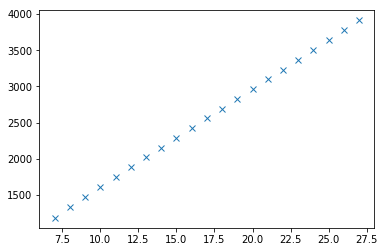

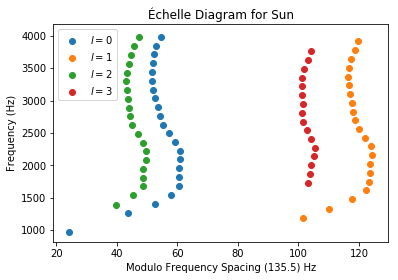

In [53]:
plt.figure(1)
plt.errorbar(l[1].n, l[1].nu, yerr=l[1].d_nu, fmt='x')
print(np.median(np.diff(l[0].nu)))
print(np.median(np.diff(l[1].nu)))

#plt.scatter(l[0].nu, np.diff(l[0].nu))
#plt.scatter()


# Échelle Plot for the data
mod = 135.5

plt.figure(2)
plt.scatter(l[0].nu % mod, l[0].nu, label=r'$l=0$')
plt.scatter(l[1].nu % mod, l[1].nu, label=r'$l=1$')
plt.scatter(l[2].nu % mod, l[2].nu, label=r'$l=2$')
plt.scatter(l[3].nu % mod, l[3].nu, label=r'$l=3$')
plt.title('Échelle Diagram for Sun')
plt.xlabel('Modulo Frequency Spacing ('+ str(mod) +') Hz')
plt.ylabel('Frequency (Hz)')
plt.legend()